In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('./SCALE불량.csv', encoding='cp949')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [3]:
# rolling_data를 datetime 형식으로 변환 
df['rolling_date'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
pd.set_option('display.max_columns', None)
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,2023-01-03 07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,2023-01-03 07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,2023-01-03 07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,2023-01-03 07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,2023-01-03 07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [4]:
df.columns

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [5]:
df['rolling_method'].value_counts()

CR(제어압연)      840
TMCP(온도제어)    160
Name: rolling_method, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   plate_no         1000 non-null   object        
 1   rolling_date     1000 non-null   datetime64[ns]
 2   scale            1000 non-null   object        
 3   spec_long        1000 non-null   object        
 4   spec_country     1000 non-null   object        
 5   steel_kind       1000 non-null   object        
 6   pt_thick         1000 non-null   int64         
 7   pt_width         1000 non-null   int64         
 8   pt_length        1000 non-null   int64         
 9   hsb              1000 non-null   object        
 10  fur_no           1000 non-null   object        
 11  fur_input_row    1000 non-null   object        
 12  fur_heat_temp    1000 non-null   int64         
 13  fur_heat_time    1000 non-null   int64         
 14  fur_soak_temp    1000 non-null   int64   

In [7]:
# 양품/불량 라벨링 (양품:0, 불량:1)
df['scale'] = df['scale'].str.replace('양품', '0')
df['scale'] = df['scale'].str.replace('불량', '1')
df['scale'] = df['scale'].astype(int)


In [8]:
# hsb 라벨링 (적용:0, 미적용1)
df['hsb'] = df['hsb'].str.replace('미적용', '1')
df['hsb'] = df['hsb'].str.replace('적용', '0')
df['hsb'] = df['hsb'].astype(int)

In [9]:
# fur_no 단위 제거 
df['fur_no'] = df['fur_no'].str.replace('호기', '')
df['fur_no'] = df['fur_no'].astype(int)

In [10]:
# fur_input_row 단위 제거 
df['fur_input_row'] = df['fur_input_row'].str.replace('열', '')
df['fur_input_row'] = df['fur_input_row'].astype(int)

In [11]:
# work_group 단위 제거 
df['work_group'] = df['work_group'].str.replace('조', '')
df['work_group'] = df['work_group'].astype(int)

In [12]:
df['rolling_method'] = df['rolling_method'].str.split('(').str[0]

# 결과 확인
print(df['rolling_method'].value_counts())

CR      840
TMCP    160
Name: rolling_method, dtype: int64


In [14]:
# 문자열 분리 및 처리
def split_spec(spec):
    # 먼저 '-', '/'를 ' '로 바꿔줌
    spec_parts = spec.replace('-', ' ').replace('/', ' ').split()
    
    # 세 번째 파트가 없으면 'CR'을 추가
    if len(spec_parts) == 2:
        spec_parts.append('CR')
    
    return pd.Series(spec_parts)

# 분리된 결과를 새로운 칼럼으로 저장
df[['grade', 'strength', 'process']] = df['spec_long'].apply(split_spec)

# 결과 출력
df.head()


,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,grade,strength,process
0,PLT_1001,2023-01-03 07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,0,1,1,1144,116,1133,59,259,TMCP,934,8,1,AB,EH32,TM
1,PLT_1002,2023-01-03 07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,0,1,2,1144,122,1135,53,238,TMCP,937,8,1,AB,EH32,TM
2,PLT_1003,2023-01-03 07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,0,2,1,1129,116,1121,55,258,TMCP,889,8,1,NV,E36,TM
3,PLT_1004,2023-01-03 07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,0,2,2,1152,125,1127,68,266,TMCP,885,8,1,NV,E36,TM
4,PLT_1005,2023-01-03 07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,0,3,1,1140,134,1128,48,246,TMCP,873,8,1,BV,EH36,TM


In [15]:
# 결측치 확인
df.isnull().sum()

plate_no            0
rolling_date        0
scale               0
spec_long           0
spec_country        0
steel_kind          0
pt_thick            0
pt_width            0
pt_length           0
hsb                 0
fur_no              0
fur_input_row       0
fur_heat_temp       0
fur_heat_time       0
fur_soak_temp       0
fur_soak_time       0
fur_total_time      0
rolling_method      0
rolling_temp        0
descaling_count     0
work_group          0
grade               0
strength           40
process            40
dtype: int64

In [16]:
df['fur_no'] = df['fur_no'].astype(str)
df['work_group'] = df['work_group'].astype(str)
df['combined'] = df['fur_no'] + ' ' + df['work_group']

# 결합된 칼럼에 대해 factorize를 사용하여 숫자 인덱스를 생성
df['new_index'], unique = pd.factorize(df['combined'])

# 기존의 'combined' 칼럼 제거
df = df.drop(columns='combined')

In [17]:
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,grade,strength,process,new_index
0,PLT_1001,2023-01-03 07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,0,1,1,1144,116,1133,59,259,TMCP,934,8,1,AB,EH32,TM,0
1,PLT_1002,2023-01-03 07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,0,1,2,1144,122,1135,53,238,TMCP,937,8,1,AB,EH32,TM,0
2,PLT_1003,2023-01-03 07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,0,2,1,1129,116,1121,55,258,TMCP,889,8,1,NV,E36,TM,1
3,PLT_1004,2023-01-03 07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,0,2,2,1152,125,1127,68,266,TMCP,885,8,1,NV,E36,TM,1
4,PLT_1005,2023-01-03 07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,0,3,1,1140,134,1128,48,246,TMCP,873,8,1,BV,EH36,TM,2


/tmp/ipykernel_563247/208442092.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.groupby('work_group').resample('H').sum().reset_index()
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/an

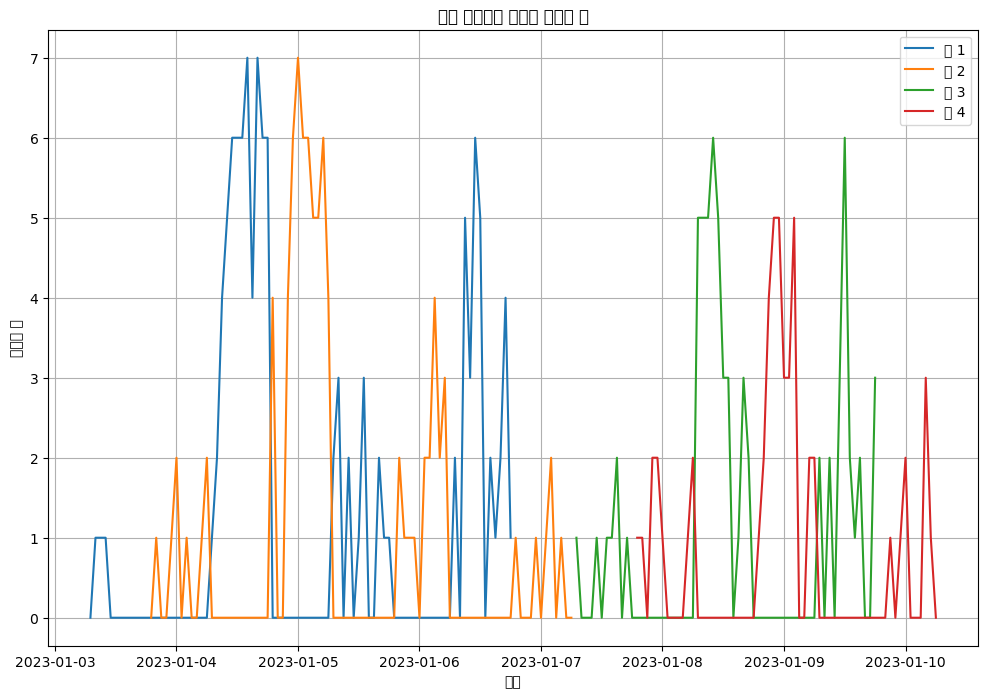

In [22]:
# 'rolling_date'를 datetime 형식으로 변환
df['rolling_date'] = pd.to_datetime(df['rolling_date'])

# 데이터프레임을 'rolling_date'를 인덱스로 설정
df.set_index('rolling_date', inplace=True)

# 시간별 집계 (1시간 간격으로 집계)
df_resampled = df.groupby('work_group').resample('H').sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))

# 조별로 그래프 그리기
for group in df_resampled['work_group'].unique():
    group_data = df_resampled[df_resampled['work_group'] == group]
    plt.plot(group_data['rolling_date'], group_data['scale'], label=f'조 {group}')

plt.xlabel('시간')
plt.ylabel('불양품 수')
plt.title('조별 시간대별 양품과 불양품 수')
plt.legend()
plt.grid(True)
plt.show()

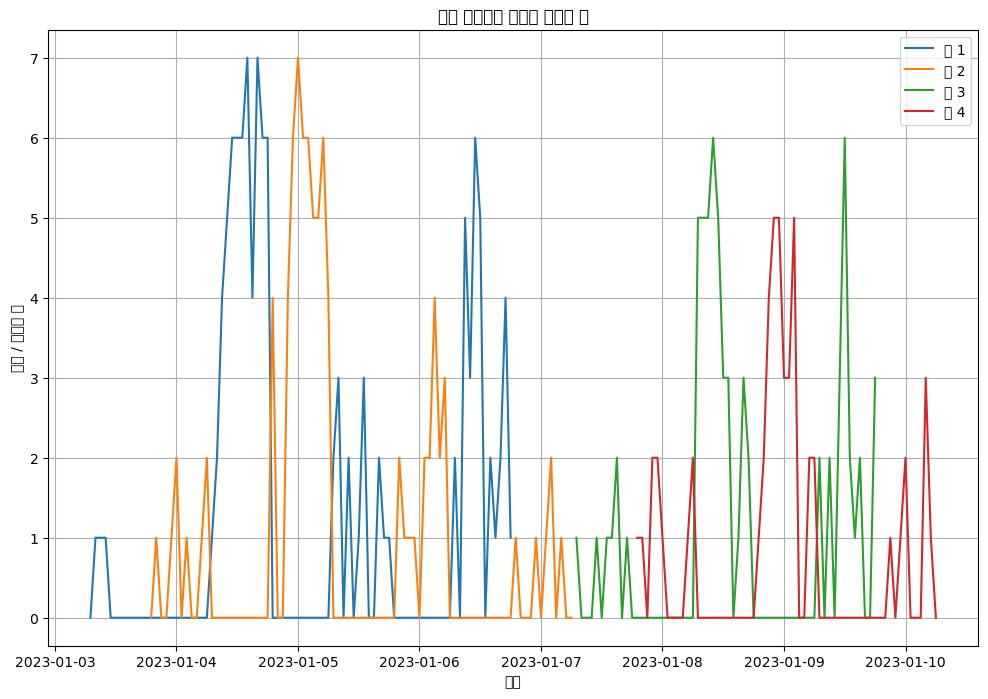

In [23]:
plt.figure(figsize=(12, 8))

# 조별로 라인 그래프 그리기
for group in df_resampled['work_group'].unique():
    group_data = df_resampled[df_resampled['work_group'] == group]
    plt.plot(group_data['rolling_date'], group_data['scale'], label=f'조 {group}')

plt.xlabel('시간')
plt.ylabel('양품 / 불양품 수')
plt.title('조별 시간대별 양품과 불양품 수')
plt.legend()
plt.grid(True)
plt.show()